# Homework 2 - 602 Principles of Data Science
### Prepared by: **Ricardo Zambrano**

In [67]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from datetime import datetime, date, time
from datetime import timedelta
import re
import matplotlib.dates as mdates
from calendar import monthrange
import matplotlib.pyplot as plt
%matplotlib inline

## Part 1: Data scraping and preparation
### Step 1: Scrape your competitor's data

* Use requests to get (as in, HTTP GET) the URL

In [2]:
spaceWeatherURL = 'https://web.archive.org/web/20201112015618/https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares.html'
r = requests.get(spaceWeatherURL)

In [3]:
r.status_code

200

* Extract the text from the page
* Use BeautifulSoup to read and parse the data, either as html or lxml

In [4]:
soup = BeautifulSoup(r.text, features='html.parser')

* Use prettify() to view the content and find the appropriate table

In [5]:
print(soup.prettify())

<!DOCTYPE doctype html>
<html lang="en">
 <head>
  <script src="//archive.org/includes/analytics.js?v=cf34f82" type="text/javascript">
  </script>
  <script type="text/javascript">
   window.addEventListener('DOMContentLoaded',function(){var v=archive_analytics.values;v.service='wb';v.server_name='wwwb-app216.us.archive.org';v.server_ms=8070;archive_analytics.send_pageview({});});
  </script>
  <script charset="utf-8" src="/_static/js/bundle-playback.js?v=U25-Dms9" type="text/javascript">
  </script>
  <script charset="utf-8" src="/_static/js/wombat.js?v=UHAOicsW" type="text/javascript">
  </script>
  <script type="text/javascript">
   __wm.init("https://web.archive.org/web");
  __wm.wombat("https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares.html","20201112015618","https://web.archive.org/","web","/_static/",
	      "1605146178");
  </script>
  <link href="/_static/css/banner-styles.css?v=fantwOh2" rel="stylesheet" type="text/css"/>
  <link href="/_static/css/iconoc

* Use find() to save the aforementioned table as a variable

In [6]:
spaceWeatherTable = soup.find("table")
spaceWeatherTable

<table class="table table-striped table-responsive-md"><thead><tr><th></th><th></th><th></th><th>Region</th><th>Start</th><th>Maximum</th><th>End</th><th></th></tr></thead><tbody><tr><td>1</td><td><span class="flare_small Xclass">X28+</span></td><td>2003/11/04</td><td><span class="badge badge-region_mag BGD"><a href="/web/20201112015618/https://www.spaceweatherlive.com/en/solar-activity/region/10486.html">0486</a></span></td><td>19:29</td><td>19:53</td><td>20:06</td><td><div class="btn-group"><a class="btn btn-xs btn-outline-dark" data-fancybox="" href="/web/20201112015618/https://www.spaceweatherlive.com/images/Archief/2003/Flares/200311041953X28.0.mp4"><i aria-hidden="true" class="far fa-play-circle"></i> Movie</a><a class="btn btn-xs btn-outline-dark" href="/web/20201112015618/https://www.spaceweatherlive.com/en/archive/2003/11/04/xray.html">View archive</a></div></td></tr><tr><td>2</td><td><span class="flare_small Xclass">X20+</span></td><td>2001/04/02</td><td><span class="badge ba

In [7]:
type(spaceWeatherTable)

bs4.element.Tag

* Use pandas to read in the HTML file. HINT make-sure the above data is properly typecast.

In [8]:
spaceWeatherData = pd.read_html(str(spaceWeatherTable), flavor='bs4')
spaceWeatherData

[    Unnamed: 0 Unnamed: 1  Unnamed: 2  Region  Start Maximum    End  \
 0            1       X28+  2003/11/04     486  19:29   19:53  20:06   
 1            2       X20+  2001/04/02    9393  21:32   21:51  22:03   
 2            3     X17.2+  2003/10/28     486  09:51   11:10  11:24   
 3            4       X17+  2005/09/07     808  17:17   17:40  18:03   
 4            5      X14.4  2001/04/15    9415  13:19   13:50  13:55   
 5            6        X10  2003/10/29     486  20:37   20:49  21:01   
 6            7       X9.4  1997/11/06    8100  11:49   11:55  12:01   
 7            8       X9.3  2017/09/06    2673  11:53   12:02  12:10   
 8            9         X9  2006/12/05     930  10:18   10:35  10:45   
 9           10       X8.3  2003/11/02     486  17:03   17:25  17:39   
 10          11       X8.2  2017/09/10    2673  15:35   16:06  16:31   
 11          12       X7.1  2005/01/20     720  06:36   07:01  07:26   
 12          13       X6.9  2011/08/09    1263  07:48   08:05  0

In [9]:
type(spaceWeatherData)

list

In [10]:
spaceWeatherDF = spaceWeatherData[0]
spaceWeatherDF

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Region,Start,Maximum,End,Unnamed: 7
0,1,X28+,2003/11/04,486,19:29,19:53,20:06,MovieView archive
1,2,X20+,2001/04/02,9393,21:32,21:51,22:03,MovieView archive
2,3,X17.2+,2003/10/28,486,09:51,11:10,11:24,MovieView archive
3,4,X17+,2005/09/07,808,17:17,17:40,18:03,MovieView archive
4,5,X14.4,2001/04/15,9415,13:19,13:50,13:55,MovieView archive
5,6,X10,2003/10/29,486,20:37,20:49,21:01,MovieView archive
6,7,X9.4,1997/11/06,8100,11:49,11:55,12:01,MovieView archive
7,8,X9.3,2017/09/06,2673,11:53,12:02,12:10,MovieView archive
8,9,X9,2006/12/05,930,10:18,10:35,10:45,MovieView archive
9,10,X8.3,2003/11/02,486,17:03,17:25,17:39,MovieView archive


In [11]:
spaceWeatherDF.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Region', 'Start', 'Maximum',
       'End', 'Unnamed: 7'],
      dtype='object')

* Set reasonable names for the table columns, e.g., rank, x_classification, date, region, start_time, maximum_time, end_time, movie. Pandas.columns makes this very simple.

In [12]:
spaceWeatherDF.columns = ['rank','x_class','date','region','start_time','max_time','end_time','movie']

In [13]:
spaceWeatherDF

,rank,x_class,date,region,start_time,max_time,end_time,movie
0,1,X28+,2003/11/04,486,19:29,19:53,20:06,MovieView archive
1,2,X20+,2001/04/02,9393,21:32,21:51,22:03,MovieView archive
2,3,X17.2+,2003/10/28,486,09:51,11:10,11:24,MovieView archive
3,4,X17+,2005/09/07,808,17:17,17:40,18:03,MovieView archive
4,5,X14.4,2001/04/15,9415,13:19,13:50,13:55,MovieView archive
5,6,X10,2003/10/29,486,20:37,20:49,21:01,MovieView archive
6,7,X9.4,1997/11/06,8100,11:49,11:55,12:01,MovieView archive
7,8,X9.3,2017/09/06,2673,11:53,12:02,12:10,MovieView archive
8,9,X9,2006/12/05,930,10:18,10:35,10:45,MovieView archive
9,10,X8.3,2003/11/02,486,17:03,17:25,17:39,MovieView archive


### Step 2: Tidy the top 50 solar flare data

* Drop the last column of the table, since we are not going to use it moving forward.

In [14]:
spaceWeatherDF = spaceWeatherDF.drop('movie', axis=1)

* Use datetime import to combine the date and each of the three time columns into three datetime columns. You will see why this is useful later on. iterrows() should prove useful here.
* Update the values in the dataframe as you do this. Set_value should prove useful.

In [15]:
spaceWeatherDF['start_datetime'] = np.nan
spaceWeatherDF['max_datetime'] = np.nan
spaceWeatherDF['end_datetime'] = np.nan

In [16]:
for idx in range(len(spaceWeatherDF)):
    startVal = spaceWeatherDF.iloc[idx,2]+"-"+spaceWeatherDF.iloc[idx,4]
    maxVal = spaceWeatherDF.iloc[idx,2]+"-"+spaceWeatherDF.iloc[idx,5]
    endVal = spaceWeatherDF.iloc[idx,2]+"-"+spaceWeatherDF.iloc[idx,6]
    startStr = datetime.strptime(startVal,"%Y/%m/%d-%H:%M")
    maxStr = datetime.strptime(maxVal,"%Y/%m/%d-%H:%M")
    endStr = datetime.strptime(endVal,"%Y/%m/%d-%H:%M")
    spaceWeatherDF.iloc[idx,7] = startStr 
    spaceWeatherDF.iloc[idx,8] = maxStr
    spaceWeatherDF.iloc[idx,9] = endStr

In [17]:
# This snippet will reorder the columns in the data frame
spaceWeather = spaceWeatherDF[['rank','x_class','start_datetime','max_datetime','end_datetime','region']]

* Set regions coded as - as missing (NaN). You can use dataframe.replace() here.

In [18]:
# First step is to find if there are any "-" or NaN values in the region column
spaceWeather['region'].isna().sum()

0

In [19]:
(spaceWeather['region']=='-').sum()

C:\Users\rzamb\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


0

There are no Nan nor "-" values in the region column of the data frame

In [20]:
spaceWeather

,rank,x_class,start_datetime,max_datetime,end_datetime,region
0,1,X28+,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,486
1,2,X20+,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,9393
2,3,X17.2+,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,486
3,4,X17+,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,808
4,5,X14.4,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,9415
5,6,X10,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00,486
6,7,X9.4,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00,8100
7,8,X9.3,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00,2673
8,9,X9,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00,930
9,10,X8.3,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00,486


### Step 3: Scrape the NASA data

* Use BeautifulSoup functions (e.g., find, findAll) and string functions (e.g., split and built-in slicing capabilities) to obtain each row of data as a long string. Create a DataFrame at this point so it’s easier to use melt or wide_to_long for the next few steps.

In [21]:
nasaURL = 'https://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html'
r2 = requests.get(nasaURL)

In [22]:
r2.status_code

200

In [23]:
soup2 = BeautifulSoup(r2.text, features='html.parser')

In [24]:
print(soup2.prettify())

<html>
 <body>
  <h2>
   Wind/WAVES type II bursts and CMEs
  </h2>
  <a href="waves_type2_description.htm">
   A Brief Description
  </a>
  <br/>
  <h4 style="padding-bottom=0px">
   Relevant Publication:
  </h4>
  Gopalswamy, N., Mäkelä, P., Yashiro, S. (2019), Sun and Geosphere, 14, 111,
  <a href="https://doi.org/10.31401/SunGeo.2019.02.03">
   DOI:10.31401/SunGeo.2019.02.03
  </a>
  <br/>
  <br/>
  <pre>
NOTE: List includes DH type II bursts observed by Wind spacecraft, 
but after STEREO launch on Oct 2006 the start and end times and 
frequencies of bursts are determined using both Wind and STEREO 
observations

                DH Type II                       Flare                     CME                   
----------------------------------------   -----------------   --------------------------   Plots
Start            End          Frequency     Loc   NOAA  Imp    Date  Time CPA  Width  Spd        
(1)        (2)   (3)   (4)   (5)    (6)     (7)    (8)  (9)    (10)  (11) (12)  (

In [25]:
nasaTable = soup2.find("pre")
nasaTable

<pre>
NOTE: List includes DH type II bursts observed by Wind spacecraft, 
but after STEREO launch on Oct 2006 the start and end times and 
frequencies of bursts are determined using both Wind and STEREO 
observations

                DH Type II                       Flare                     CME                   
----------------------------------------   -----------------   --------------------------   Plots
Start            End          Frequency     Loc   NOAA  Imp    Date  Time CPA  Width  Spd        
(1)        (2)   (3)   (4)   (5)    (6)     (7)    (8)  (9)    (10)  (11) (12)  (13) (14)   (15) 
1997/04/01 14:00 04/01 14:15  <a href="https://cdaw.gsfc.nasa.gov/CME_list/daily_movies/1997/04/01/c2rdif_waves.html">8000</a>  <a href="https://cdaw.gsfc.nasa.gov/CME_list/daily_movies/1997/04/01/c3rdif_waves.html">4000</a>   S25E16  8026 M1.3   <a href="https://cdaw.gsfc.nasa.gov/CME_list/UNIVERSAL/1997_04/jsmovies/1997_04/19970401.151838.p073g/c2_rdif.html">04/01</a> 15:18   74   79  

In [26]:
type(nasaTable)

bs4.element.Tag

The following lines of code explore where the data can be splitted

In [27]:
str(nasaTable)[0:806]

'<pre>\nNOTE: List includes DH type II bursts observed by Wind spacecraft, \nbut after STEREO launch on Oct 2006 the start and end times and \nfrequencies of bursts are determined using both Wind and STEREO \nobservations\n\n=================================================================================================\n                DH Type II                       Flare                     CME                   \n----------------------------------------   -----------------   --------------------------   Plots\nStart            End          Frequency     Loc   NOAA  Imp    Date  Time CPA  Width  Spd        \n(1)        (2)   (3)   (4)   (5)    (6)     (7)    (8)  (9)    (10)  (11) (12)  (13) (14)   (15) \n=================================================================================================\n'

In [28]:
str(nasaTable)[-105:-1]

'\n=================================================================================================\n</pre'

In [29]:
str(nasaTable)[806:1550]

'1997/04/01 14:00 04/01 14:15  <a href="https://cdaw.gsfc.nasa.gov/CME_list/daily_movies/1997/04/01/c2rdif_waves.html">8000</a>  <a href="https://cdaw.gsfc.nasa.gov/CME_list/daily_movies/1997/04/01/c3rdif_waves.html">4000</a>   S25E16  8026 M1.3   <a href="https://cdaw.gsfc.nasa.gov/CME_list/UNIVERSAL/1997_04/jsmovies/1997_04/19970401.151838.p073g/c2_rdif.html">04/01</a> 15:18   74   79  <a href="https://cdaw.gsfc.nasa.gov/CME_list/UNIVERSAL/1997_04/htpng/19970401.151838.p073g.htp.html">312</a>   <a href="https://cdaw.gsfc.nasa.gov/CME_list/daily_plots/sephtx/1997_04/sephtx_19970401.png">PHTX</a>\n1997/04/07 14:30 04/07 17:30 <a href="https://cdaw.gsfc.nasa.gov/CME_list/daily_movies/1997/04/07/c2rdif_waves.html">11000</a>  <a href="http'

In [30]:
nasaLines = str(nasaTable).split('\n')
nasaLines

['<pre>',
 'NOTE: List includes DH type II bursts observed by Wind spacecraft, ',
 'but after STEREO launch on Oct 2006 the start and end times and ',
 'frequencies of bursts are determined using both Wind and STEREO ',
 'observations',
 '',
 '=================================================================================================',
 '                DH Type II                       Flare                     CME                   ',
 '----------------------------------------   -----------------   --------------------------   Plots',
 'Start            End          Frequency     Loc   NOAA  Imp    Date  Time CPA  Width  Spd        ',
 '(1)        (2)   (3)   (4)   (5)    (6)     (7)    (8)  (9)    (10)  (11) (12)  (13) (14)   (15) ',
 '=================================================================================================',
 '1997/04/01 14:00 04/01 14:15  <a href="https://cdaw.gsfc.nasa.gov/CME_list/daily_movies/1997/04/01/c2rdif_waves.html">8000</a>  <a href="https:/

In [31]:
# Now I remove the lines of text that have no relevant data
nasaLines[11]

'================================================================================================='

In [32]:
len(nasaLines)

536

In [33]:
nasaLines[534:536]

['=================================================================================================',
 '</pre>']

In [34]:
nasaDataLines = nasaLines[12:534]
nasaDataLines

['1997/04/01 14:00 04/01 14:15  <a href="https://cdaw.gsfc.nasa.gov/CME_list/daily_movies/1997/04/01/c2rdif_waves.html">8000</a>  <a href="https://cdaw.gsfc.nasa.gov/CME_list/daily_movies/1997/04/01/c3rdif_waves.html">4000</a>   S25E16  8026 M1.3   <a href="https://cdaw.gsfc.nasa.gov/CME_list/UNIVERSAL/1997_04/jsmovies/1997_04/19970401.151838.p073g/c2_rdif.html">04/01</a> 15:18   74   79  <a href="https://cdaw.gsfc.nasa.gov/CME_list/UNIVERSAL/1997_04/htpng/19970401.151838.p073g.htp.html">312</a>   <a href="https://cdaw.gsfc.nasa.gov/CME_list/daily_plots/sephtx/1997_04/sephtx_19970401.png">PHTX</a>',
 '1997/04/07 14:30 04/07 17:30 <a href="https://cdaw.gsfc.nasa.gov/CME_list/daily_movies/1997/04/07/c2rdif_waves.html">11000</a>  <a href="https://cdaw.gsfc.nasa.gov/CME_list/daily_movies/1997/04/07/c3rdif_waves.html">1000</a>   S28E19  8027 C6.8   <a href="https://cdaw.gsfc.nasa.gov/CME_list/UNIVERSAL/1997_04/jsmovies/1997_04/19970407.142744.p123g/c2_rdif.html">04/07</a> 14:27 Halo  360  <

In [35]:
len(nasaDataLines)

522

In [36]:
regex1 = re.compile(r"<a([\s]+[^>]+)>|(<\/a>)")

In [37]:
nasaDataLinesNoLinks = [regex1.sub("",row) for row in nasaDataLines]

In [38]:
nasaDataLinesNoLinks

['1997/04/01 14:00 04/01 14:15  8000  4000   S25E16  8026 M1.3   04/01 15:18   74   79  312   PHTX',
 '1997/04/07 14:30 04/07 17:30 11000  1000   S28E19  8027 C6.8   04/07 14:27 Halo  360  878   PHTX',
 '1997/05/12 05:15 05/14 16:00 12000    80   N21W08  8038 C1.3   05/12 05:30 Halo  360  464   PHTX',
 '1997/05/21 20:20 05/21 22:00  5000   500   N05W12  8040 M1.3   05/21 21:00  263  165  296   PHTX',
 '1997/09/23 21:53 09/23 22:16  6000  2000   S29E25  8088 C1.4   09/23 22:02  133  155  712   PHTX',
 '1997/11/03 05:15 11/03 12:00 14000   250   S20W13  8100 C8.6   11/03 05:28  240  109  227   PHTX',
 '1997/11/03 10:30 11/03 11:30 14000  5000   S16W21  8100 M4.2   11/03 11:11  233  122  352   PHTX',
 '1997/11/04 06:00 11/05 04:30 14000   100   S14W33  8100 X2.1   11/04 06:10 Halo  360  785   PHTX',
 '1997/11/06 12:20 11/07 08:30 14000   100   S18W63  8100 X9.4   11/06 12:10 Halo  360 1556   PHTX',
 '1997/11/27 13:30 11/27 14:00 14000  7000   N17E63  8113 X2.6   11/27 13:56   98   91  441

In [39]:
nasaRows = [re.split(r"\s+",row) for row in nasaDataLinesNoLinks]

In [40]:
nasaRows

[['1997/04/01',
  '14:00',
  '04/01',
  '14:15',
  '8000',
  '4000',
  'S25E16',
  '8026',
  'M1.3',
  '04/01',
  '15:18',
  '74',
  '79',
  '312',
  'PHTX'],
 ['1997/04/07',
  '14:30',
  '04/07',
  '17:30',
  '11000',
  '1000',
  'S28E19',
  '8027',
  'C6.8',
  '04/07',
  '14:27',
  'Halo',
  '360',
  '878',
  'PHTX'],
 ['1997/05/12',
  '05:15',
  '05/14',
  '16:00',
  '12000',
  '80',
  'N21W08',
  '8038',
  'C1.3',
  '05/12',
  '05:30',
  'Halo',
  '360',
  '464',
  'PHTX'],
 ['1997/05/21',
  '20:20',
  '05/21',
  '22:00',
  '5000',
  '500',
  'N05W12',
  '8040',
  'M1.3',
  '05/21',
  '21:00',
  '263',
  '165',
  '296',
  'PHTX'],
 ['1997/09/23',
  '21:53',
  '09/23',
  '22:16',
  '6000',
  '2000',
  'S29E25',
  '8088',
  'C1.4',
  '09/23',
  '22:02',
  '133',
  '155',
  '712',
  'PHTX'],
 ['1997/11/03',
  '05:15',
  '11/03',
  '12:00',
  '14000',
  '250',
  'S20W13',
  '8100',
  'C8.6',
  '11/03',
  '05:28',
  '240',
  '109',
  '227',
  'PHTX'],
 ['1997/11/03',
  '10:30',
  '11/03

In [41]:
nasaDataFrameRaw = pd.DataFrame(nasaRows)

In [42]:
nasaDataFrameRaw

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,...,PHTX,None,None,None,None,None,None,None,None,None
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,...,PHTX,None,None,None,None,None,None,None,None,None
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,...,PHTX,None,None,None,None,None,None,None,None,None
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,...,PHTX,None,None,None,None,None,None,None,None,None
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,...,PHTX,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,2017/09/17,11:45,09/17,12:35,16000,900,S08E170,-----,----,09/17,...,PHTX,STEREO,A,data,None,None,None,None,None,None
518,2017/10/18,05:48,10/18,12:40,16000,400,S06E123,-----,----,10/18,...,PHTX,STEREO,A,"data,",faint,in,WIND,None,None,None
519,2019/05/03,23:52,05/04,00:16,13000,2300,N12E82,12740,C1.0,05/03,...,PHTX,None,None,None,None,None,None,None,None,None
520,2020/11/29,13:07,11/29,15:23,14000,850,S23E89,-----,M4.4,11/29,...,----,None,None,None,None,None,None,None,None,None


In [43]:
nasaDataFrame = nasaDataFrameRaw
nasaDataFrame['Notes'] = nasaDataFrame[15].astype(str)+" "+nasaDataFrame[16].astype(str)+" "+nasaDataFrame[17].astype(str)+" "+nasaDataFrame[18].astype(str)+" "+nasaDataFrame[19].astype(str)+" "+nasaDataFrame[20].astype(str)+" "+nasaDataFrame[21].astype(str)+" "+nasaDataFrame[22].astype(str)+" "+nasaDataFrame[23].astype(str)

In [44]:
nasaDataFrame['Notes'] = nasaDataFrame['Notes'].str.replace('None','')

In [45]:
nasaDataFrame.columns=['start_date','start_time','end_date','end_time','start_frequency','end_frequency','solar_flare_location','NOAA_flare_region','soft_Xray_flare_importance','date_associated_CME','time_associated_CME','central_pos_angle','CME_width','CME_speed','Link_to_PHTX','c15','c16','c17','c18','c19','c20','c21','c22','c23','Notes']

In [46]:
nasaDataFrame = nasaDataFrame.drop(columns=['c15','c16','c17','c18','c19','c20','c21','c22','c23'], axis=1)

In [47]:
nasaDataFrame

,start_date,start_time,end_date,end_time,start_frequency,end_frequency,solar_flare_location,NOAA_flare_region,soft_Xray_flare_importance,date_associated_CME,time_associated_CME,central_pos_angle,CME_width,CME_speed,Link_to_PHTX,Notes
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312,PHTX,
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878,PHTX,
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464,PHTX,
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296,PHTX,
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712,PHTX,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,2017/09/17,11:45,09/17,12:35,16000,900,S08E170,-----,----,09/17,12:00,Halo,360,1385,PHTX,STEREO A data
518,2017/10/18,05:48,10/18,12:40,16000,400,S06E123,-----,----,10/18,08:00,85,146,1001,PHTX,"STEREO A data, faint in WIND"
519,2019/05/03,23:52,05/04,00:16,13000,2300,N12E82,12740,C1.0,05/03,23:24,90,113,692,PHTX,
520,2020/11/29,13:07,11/29,15:23,14000,850,S23E89,-----,M4.4,11/29,13:25,Halo,360,2077,----,


### Step 4: Tidy the NASA table

Now, we tidy up the NASA table. Here we will code missing observations properly, recode columns that correspond to more than one piece of information, and treat dates and times appropriately.

* Recode any missing entries as NaN. Refer to the data description in http://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2_description.htm (and above) to see how missing entries are encoded in each column. Be sure to look carefully at the actual data, as the nasa descriptions might not be completely accurate.

In [48]:
nasaDataFrame = nasaDataFrame.replace(['------','-----','----','---','--/--','--:--','????'],np.nan)
nasaDataFrame['Notes'] = nasaDataFrame['Notes'].str.strip()
nasaDataFrame['Notes'] = nasaDataFrame['Notes'].replace("",np.nan)
#nasaDataFrame = nasaDataFrame.drop(columns=['Link_to_PHTX'], axis=1)
nasaDataFrame

,start_date,start_time,end_date,end_time,start_frequency,end_frequency,solar_flare_location,NOAA_flare_region,soft_Xray_flare_importance,date_associated_CME,time_associated_CME,central_pos_angle,CME_width,CME_speed,Link_to_PHTX,Notes
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312,PHTX,NaN
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878,PHTX,NaN
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464,PHTX,NaN
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296,PHTX,NaN
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712,PHTX,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,2017/09/17,11:45,09/17,12:35,16000,900,S08E170,NaN,NaN,09/17,12:00,Halo,360,1385,PHTX,STEREO A data
518,2017/10/18,05:48,10/18,12:40,16000,400,S06E123,NaN,NaN,10/18,08:00,85,146,1001,PHTX,"STEREO A data, faint in WIND"
519,2019/05/03,23:52,05/04,00:16,13000,2300,N12E82,12740,C1.0,05/03,23:24,90,113,692,PHTX,NaN
520,2020/11/29,13:07,11/29,15:23,14000,850,S23E89,NaN,M4.4,11/29,13:25,Halo,360,2077,NaN,NaN


* The CPA column (cme_angle) contains angles in degrees for most rows, except for halo flares, which are coded as Halo. Create a new column that indicates if a row corresponds to a halo flare or not, and then replace Halo entries in the cme_angle column as NA.

In [49]:
nasaDataFrame['is_halo'] = np.where(nasaDataFrame['central_pos_angle']=='Halo',True,False)

In [50]:
nasaDataFrame['central_pos_angle'] = nasaDataFrame['central_pos_angle'].replace("Halo",np.nan)

In [51]:
set(nasaDataFrame['is_halo'])

{False, True}

* The width column indicates if the given value is a lower bound. Create a new column that indicates if width is given as a lower bound, and remove any non-numeric part of the width column.

In [52]:
pattern1 = '&gt;'

In [53]:
pattern1 in nasaDataFrame.iloc[21,12]

True

In [54]:
nasaDataFrame['with_lower_bound'] = nasaDataFrame['CME_width'].str.contains('&gt;')

In [55]:
nasaDataFrame.iloc[21,17]

True

In [56]:
nasaDataFrame.iloc[20,17]

False

In [57]:
nasaDataFrame.iloc[21,12]

'&gt;301'

In [58]:
nasaDataFrame['CME_width'] = nasaDataFrame['CME_width'].str.replace('&gt;','')

In [59]:
nasaDataFrame.iloc[21,12]

'301'

In [60]:
test1 = nasaDataFrame['CME_width']
set(test1)

{'100',
 '101',
 '103',
 '104',
 '105',
 '106',
 '108',
 '109',
 '111',
 '112',
 '113',
 '116',
 '118',
 '119',
 '120',
 '121',
 '122',
 '125',
 '129',
 '130',
 '131',
 '132',
 '133',
 '134',
 '136',
 '138',
 '139',
 '140',
 '141',
 '142',
 '146',
 '148',
 '150',
 '154',
 '155',
 '156',
 '157',
 '158',
 '159',
 '160',
 '161',
 '162',
 '164',
 '165',
 '166',
 '167',
 '169',
 '170',
 '171',
 '173',
 '175',
 '176',
 '177',
 '178',
 '179',
 '181',
 '182',
 '184',
 '186',
 '188',
 '189',
 '19',
 '190',
 '193',
 '195',
 '196',
 '197',
 '198',
 '199',
 '205',
 '207',
 '208',
 '209',
 '210',
 '211',
 '212',
 '213',
 '214',
 '216',
 '217',
 '223',
 '228',
 '229',
 '236',
 '237',
 '239',
 '242',
 '243',
 '244',
 '245',
 '250',
 '252',
 '254',
 '26',
 '261',
 '262',
 '263',
 '264',
 '267',
 '268',
 '272',
 '273',
 '276',
 '281',
 '282',
 '289',
 '292',
 '301',
 '314',
 '360',
 '360h',
 '38',
 '43',
 '48',
 '50',
 '51',
 '55',
 '56',
 '59',
 '60',
 '64',
 '65',
 '66',
 '68',
 '70',
 '73',
 '76',
 

**Ric wrote:** There is a record with a value equal to 360h. We will ignore this typo for the purposes of this assignment

In [61]:
nasaDataFrame

,start_date,start_time,end_date,end_time,start_frequency,end_frequency,solar_flare_location,NOAA_flare_region,soft_Xray_flare_importance,date_associated_CME,time_associated_CME,central_pos_angle,CME_width,CME_speed,Link_to_PHTX,Notes,is_halo,with_lower_bound
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312,PHTX,NaN,False,False
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,NaN,360,878,PHTX,NaN,True,False
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,NaN,360,464,PHTX,NaN,True,False
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296,PHTX,NaN,False,False
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712,PHTX,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,2017/09/17,11:45,09/17,12:35,16000,900,S08E170,NaN,NaN,09/17,12:00,NaN,360,1385,PHTX,STEREO A data,True,False
518,2017/10/18,05:48,10/18,12:40,16000,400,S06E123,NaN,NaN,10/18,08:00,85,146,1001,PHTX,"STEREO A data, faint in WIND",False,False
519,2019/05/03,23:52,05/04,00:16,13000,2300,N12E82,12740,C1.0,05/03,23:24,90,113,692,PHTX,NaN,False,False
520,2020/11/29,13:07,11/29,15:23,14000,850,S23E89,NaN,M4.4,11/29,13:25,NaN,360,2077,NaN,NaN,True,False


* Combine date and time columns for start, end and cme so they can be encoded as datetime objects.

In [62]:
nasaDataFrame['start_datetime'] = np.nan
nasaDataFrame['end_datetime'] = np.nan
nasaDataFrame['cme_datetime'] = np.nan

In [63]:
# There are time values not allowed in the 24 hour format of datetime library
# We need to find them and replace them and:
# 1- Replace the 24:00 with 00:00
# 2- Adjust the date to the next day
nasaDataFrame['end_time'] = nasaDataFrame['end_time'].replace('24:00','00:00')

In [72]:
from datetime import timedelta
for idx in range(len(nasaDataFrame)):
    if nasaDataFrame.iloc[idx,3] == '00:00':
        dateAt24h = datetime.strptime(str((datetime.strptime(nasaDataFrame.iloc[idx,0],"%Y/%m/%d")).year)+'/'+nasaDataFrame.iloc[idx,2],"%Y/%m/%d")
        dateAt00h = dateAt24h + timedelta(days=1)
        #dateAt24hS = dateAt24h.strftime('%Y/%m/%d')
        #dateAt00hS = dateAt00h.strftime('%Y/%m/%d')
        dateAt00hM = dateAt00h.strftime('%m/%d')
        #print('original date =',dateAt24hS,'new date=',dateAt00hS)
        nasaDataFrame.iloc[idx,2] = dateAt00hM


In [73]:
nasaDataFrame.columns

Index(['start_date', 'start_time', 'end_date', 'end_time', 'start_frequency',
       'end_frequency', 'solar_flare_location', 'NOAA_flare_region',
       'soft_Xray_flare_importance', 'date_associated_CME',
       'time_associated_CME', 'central_pos_angle', 'CME_width', 'CME_speed',
       'Link_to_PHTX', 'Notes', 'is_halo', 'with_lower_bound',
       'start_datetime', 'end_datetime', 'cme_datetime'],
      dtype='object')

In [74]:
# There are some null values that we need to skip while looping
print('start_date',nasaDataFrame['start_date'].isna().sum())
print('start_time',nasaDataFrame['start_time'].isna().sum())
print('end_date',nasaDataFrame['end_date'].isna().sum())
print('end_time',nasaDataFrame['end_time'].isna().sum())
print('date_associated_CME',nasaDataFrame['date_associated_CME'].isna().sum())
print('time_associated_CME',nasaDataFrame['time_associated_CME'].isna().sum())

start_date 0
start_time 0
end_date 0
end_time 0
date_associated_CME 22
time_associated_CME 22


In [75]:
for idx in range(len(nasaDataFrame)):
    startVal = nasaDataFrame.iloc[idx,0]+"-"+nasaDataFrame.iloc[idx,1]
    endVal = str((datetime.strptime(nasaDataFrame.iloc[idx,0],"%Y/%m/%d")).year)+'/'+nasaDataFrame.iloc[idx,2]+"-"+nasaDataFrame.iloc[idx,3]
    if pd.isnull(nasaDataFrame.iloc[idx,9]) or pd.isnull(nasaDataFrame.iloc[idx,10]):
        cmeVal = np.nan
    else:
        cmeVal = str((datetime.strptime(nasaDataFrame.iloc[idx,0],"%Y/%m/%d")).year)+'/'+nasaDataFrame.iloc[idx,9]+"-"+nasaDataFrame.iloc[idx,10]
    startStr = datetime.strptime(startVal,"%Y/%m/%d-%H:%M")
    endStr = datetime.strptime(endVal,"%Y/%m/%d-%H:%M")
    if pd.isnull(cmeVal):
        cmeStr = np.nan
    else:
        cmeStr = datetime.strptime(cmeVal,"%Y/%m/%d-%H:%M")
    nasaDataFrame.iloc[idx,18] = startStr 
    nasaDataFrame.iloc[idx,19] = endStr
    nasaDataFrame.iloc[idx,20] = cmeStr

In [76]:
# This block of code is to check the missbehaved cme column was processed correctly 
for idx in range(len(nasaDataFrame)):
    print('--------')
    print(nasaDataFrame.iloc[idx,9])
    print(nasaDataFrame.iloc[idx,10])
    print(nasaDataFrame.iloc[idx,20])
    print('--------')

--------
04/01
15:18
1997-04-01 15:18:00
--------
--------
04/07
14:27
1997-04-07 14:27:00
--------
--------
05/12
05:30
1997-05-12 05:30:00
--------
--------
05/21
21:00
1997-05-21 21:00:00
--------
--------
09/23
22:02
1997-09-23 22:02:00
--------
--------
11/03
05:28
1997-11-03 05:28:00
--------
--------
11/03
11:11
1997-11-03 11:11:00
--------
--------
11/04
06:10
1997-11-04 06:10:00
--------
--------
11/06
12:10
1997-11-06 12:10:00
--------
--------
11/27
13:56
1997-11-27 13:56:00
--------
--------
12/13
00:26
1997-12-13 00:26:00
--------
--------
01/25
15:26
1998-01-25 15:26:00
--------
--------
03/29
03:48
1998-03-29 03:48:00
--------
--------
04/20
10:07
1998-04-20 10:07:00
--------
--------
04/23
05:55
1998-04-23 05:55:00
--------
--------
04/24
08:55
1998-04-24 08:55:00
--------
--------
04/27
08:56
1998-04-27 08:56:00
--------
--------
04/29
16:58
1998-04-29 16:58:00
--------
--------
05/02
14:06
1998-05-02 14:06:00
--------
--------
05/06
08:29
1998-05-06 08:29:00
--------


In [77]:
nasaDataFrame.columns

Index(['start_date', 'start_time', 'end_date', 'end_time', 'start_frequency',
       'end_frequency', 'solar_flare_location', 'NOAA_flare_region',
       'soft_Xray_flare_importance', 'date_associated_CME',
       'time_associated_CME', 'central_pos_angle', 'CME_width', 'CME_speed',
       'Link_to_PHTX', 'Notes', 'is_halo', 'with_lower_bound',
       'start_datetime', 'end_datetime', 'cme_datetime'],
      dtype='object')

In [78]:
nasaDF = nasaDataFrame[['start_datetime', 'end_datetime','start_frequency',
       'end_frequency', 'solar_flare_location', 'NOAA_flare_region',
       'soft_Xray_flare_importance','cme_datetime','central_pos_angle', 'CME_width', 'CME_speed',
       'Link_to_PHTX', 'Notes', 'is_halo', 'with_lower_bound']].copy()

In [79]:
set(nasaDF['is_halo'])

{False, True}

In [80]:
set(nasaDF['with_lower_bound'])

{False, True, nan}

In [81]:
nasaDF

,start_datetime,end_datetime,start_frequency,end_frequency,solar_flare_location,NOAA_flare_region,soft_Xray_flare_importance,cme_datetime,central_pos_angle,CME_width,CME_speed,Link_to_PHTX,Notes,is_halo,with_lower_bound
0,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,1997-04-01 15:18:00,74,79,312,PHTX,NaN,False,False
1,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,1997-04-07 14:27:00,NaN,360,878,PHTX,NaN,True,False
2,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038,C1.3,1997-05-12 05:30:00,NaN,360,464,PHTX,NaN,True,False
3,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,8040,M1.3,1997-05-21 21:00:00,263,165,296,PHTX,NaN,False,False
4,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,8088,C1.4,1997-09-23 22:02:00,133,155,712,PHTX,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,2017-09-17 11:45:00,2017-09-17 12:35:00,16000,900,S08E170,NaN,NaN,2017-09-17 12:00:00,NaN,360,1385,PHTX,STEREO A data,True,False
518,2017-10-18 05:48:00,2017-10-18 12:40:00,16000,400,S06E123,NaN,NaN,2017-10-18 08:00:00,85,146,1001,PHTX,"STEREO A data, faint in WIND",False,False
519,2019-05-03 23:52:00,2019-05-04 00:16:00,13000,2300,N12E82,12740,C1.0,2019-05-03 23:24:00,90,113,692,PHTX,NaN,False,False
520,2020-11-29 13:07:00,2020-11-29 15:23:00,14000,850,S23E89,NaN,M4.4,2020-11-29 13:25:00,NaN,360,2077,NaN,NaN,True,False


## Part 2: Analysis

### Question 1: Replication

* Can you replicate the top 50 solar flare table in SpaceWeatherLive.com exactly using the data obtained from NASA? That is, if you get the top 50 solar flares from the NASA table based on their classification (e.g., X28 is the highest) 
* Do you get data for the same solar flare events?

Include code used to get the top 50 solar flares from the NASA table (be careful when ordering by classification). 

* Write a sentence or two discussing how well you can replicate the SpaceWeatherLive data from the NASA data.

In [82]:
set(nasaDF['soft_Xray_flare_importance'])

{'B3.8',
 'B4.5',
 'B5.7',
 'B6.6',
 'B9.4',
 'B9.5',
 'C1.0',
 'C1.1',
 'C1.2',
 'C1.3',
 'C1.4',
 'C1.5',
 'C1.6',
 'C1.7',
 'C1.8',
 'C2.0',
 'C2.1',
 'C2.2',
 'C2.3',
 'C2.4',
 'C2.5',
 'C2.6',
 'C2.7',
 'C2.8',
 'C2.9',
 'C3.0',
 'C3.1',
 'C3.2',
 'C3.3',
 'C3.5',
 'C3.6',
 'C3.7',
 'C3.9',
 'C4.0',
 'C4.1',
 'C4.4',
 'C4.5',
 'C4.6',
 'C4.7',
 'C5.2',
 'C5.4',
 'C5.6',
 'C5.9',
 'C6.3',
 'C6.5',
 'C6.6',
 'C6.8',
 'C7.2',
 'C7.3',
 'C7.4',
 'C7.5',
 'C7.6',
 'C7.7',
 'C7.8',
 'C7.9',
 'C8.0',
 'C8.1',
 'C8.3',
 'C8.4',
 'C8.5',
 'C8.6',
 'C8.7',
 'C8.8',
 'C8.9',
 'C9.1',
 'C9.5',
 'C9.6',
 'C9.7',
 'C9.9',
 'FILA',
 'M1.0',
 'M1.1',
 'M1.2',
 'M1.3',
 'M1.4',
 'M1.5',
 'M1.6',
 'M1.7',
 'M1.8',
 'M1.9',
 'M2.0',
 'M2.1',
 'M2.2',
 'M2.3',
 'M2.4',
 'M2.5',
 'M2.6',
 'M2.7',
 'M2.8',
 'M2.9',
 'M3.0',
 'M3.1',
 'M3.2',
 'M3.5',
 'M3.6',
 'M3.7',
 'M3.8',
 'M3.9',
 'M4.0',
 'M4.2',
 'M4.4',
 'M4.5',
 'M4.6',
 'M4.7',
 'M4.8',
 'M4.9',
 'M5.0',
 'M5.1',
 'M5.2',
 'M5.3',
 'M5.4',
 

In [83]:
nasaDF['importance_alpha'] = np.nan
nasaDF['importance_num'] = np.nan

In [84]:
nasaDF.columns

Index(['start_datetime', 'end_datetime', 'start_frequency', 'end_frequency',
       'solar_flare_location', 'NOAA_flare_region',
       'soft_Xray_flare_importance', 'cme_datetime', 'central_pos_angle',
       'CME_width', 'CME_speed', 'Link_to_PHTX', 'Notes', 'is_halo',
       'with_lower_bound', 'importance_alpha', 'importance_num'],
      dtype='object')

In [85]:
len(nasaDF.columns)

17

In [86]:
nasaDF['soft_Xray_flare_importance'].isna().sum()

115

In [87]:
len(nasaDF)

522

**Ric wrote:** Because the sorting of a strings does not work well with alpha-numeric combinations I will create two columns: one with the alpha portion of the importance of the solar flare and another with the numeric portion of the importance of the solar flare (casted as a float). This will allow me to sort the data set in descending order first by alphabetic value and then by the float value. Following this sorting strategy I will get the solar flare with an inportance of 'X28' at the top, followed by 'X20';'X17'; and so on.

In [88]:
for indx in range(len(nasaDF)):
    if pd.isnull(nasaDF.iloc[indx,6])==True or nasaDF.iloc[indx,6]=='FILA':
        nasaDF.iloc[indx,15] = np.nan
        nasaDF.iloc[indx,16] = np.nan
        #print(indx,nasaDF.iloc[indx,6])
    else:
        nasaDF.iloc[indx,15] = nasaDF.iloc[indx,6][0:1]
        nasaDF.iloc[indx,16] = float(nasaDF.iloc[indx,6][1:])
        #print(nasaDF.iloc[indx,6][0:1])
        #print(float(nasaDF.iloc[indx,6][1:]))

In [89]:
nasaDF_sorted = nasaDF.sort_values(by=['importance_alpha','importance_num'],ascending=False)
nasaDF_sorted

,start_datetime,end_datetime,start_frequency,end_frequency,solar_flare_location,NOAA_flare_region,soft_Xray_flare_importance,cme_datetime,central_pos_angle,CME_width,CME_speed,Link_to_PHTX,Notes,is_halo,with_lower_bound,importance_alpha,importance_num
240,2003-11-04 20:00:00,2003-11-05 00:00:00,10000,200,S19W83,10486,X28.,2003-11-04 19:54:00,NaN,360,2657,PHTX,NaN,True,False,X,28.0
117,2001-04-02 22:05:00,2001-04-03 02:30:00,14000,250,N19W72,9393,X20.,2001-04-02 22:06:00,261,244,2505,PHTX,NaN,False,False,X,20.0
233,2003-10-28 11:10:00,2003-10-30 00:00:00,14000,40,S16E08,10486,X17.,2003-10-28 11:30:00,NaN,360,2459,PHTX,NaN,True,False,X,17.0
126,2001-04-15 14:05:00,2001-04-16 13:00:00,14000,40,S20W85,9415,X14.,2001-04-15 14:06:00,245,167,1199,PHTX,NaN,False,False,X,14.0
234,2003-10-29 20:55:00,2003-10-30 00:00:00,11000,500,S15W02,10486,X10.,2003-10-29 20:54:00,NaN,360,2029,PHTX,NaN,True,False,X,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,2016-08-15 18:21:00,2016-08-15 18:28:00,11000,3400,E90b,NaN,NaN,2016-08-15 17:24:00,75,98,633,PHTX,NaN,False,False,NaN,NaN
510,2017-04-23 06:00:00,2017-04-23 06:13:00,15000,8300,N16E41,NaN,NaN,2017-04-23 06:00:00,85,77,955,PHTX,NaN,False,False,NaN,NaN
512,2017-07-23 05:27:00,2017-07-23 06:12:00,4400,900,BACK,NaN,NaN,2017-07-23 04:48:00,NaN,360,1848,PHTX,faint,True,False,NaN,NaN
517,2017-09-17 11:45:00,2017-09-17 12:35:00,16000,900,S08E170,NaN,NaN,2017-09-17 12:00:00,NaN,360,1385,PHTX,STEREO A data,True,False,NaN,NaN


In [90]:
nasaDF_sorted.head(50)

,start_datetime,end_datetime,start_frequency,end_frequency,solar_flare_location,NOAA_flare_region,soft_Xray_flare_importance,cme_datetime,central_pos_angle,CME_width,CME_speed,Link_to_PHTX,Notes,is_halo,with_lower_bound,importance_alpha,importance_num
240,2003-11-04 20:00:00,2003-11-05 00:00:00,10000,200,S19W83,10486,X28.,2003-11-04 19:54:00,NaN,360,2657,PHTX,NaN,True,False,X,28.0
117,2001-04-02 22:05:00,2001-04-03 02:30:00,14000,250,N19W72,9393,X20.,2001-04-02 22:06:00,261,244,2505,PHTX,NaN,False,False,X,20.0
233,2003-10-28 11:10:00,2003-10-30 00:00:00,14000,40,S16E08,10486,X17.,2003-10-28 11:30:00,NaN,360,2459,PHTX,NaN,True,False,X,17.0
126,2001-04-15 14:05:00,2001-04-16 13:00:00,14000,40,S20W85,9415,X14.,2001-04-15 14:06:00,245,167,1199,PHTX,NaN,False,False,X,14.0
234,2003-10-29 20:55:00,2003-10-30 00:00:00,11000,500,S15W02,10486,X10.,2003-10-29 20:54:00,NaN,360,2029,PHTX,NaN,True,False,X,10.0
8,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,NaN,360,1556,PHTX,NaN,True,False,X,9.4
514,2017-09-06 12:05:00,2017-09-07 08:00:00,16000,70,S08W33,12673,X9.3,2017-09-06 12:24:00,NaN,360,1571,PHTX,NaN,True,False,X,9.3
328,2006-12-05 10:50:00,2006-12-05 20:00:00,14000,250,S07E68,10930,X9.0,NaN,NaN,NaN,NaN,PHTX,LASCO_DATA_GAP,False,NaN,X,9.0
237,2003-11-02 17:30:00,2003-11-03 01:00:00,12000,250,S14W56,10486,X8.3,2003-11-02 17:30:00,NaN,360,2598,PHTX,NaN,True,False,X,8.3
515,2017-09-10 16:02:00,2017-09-11 06:50:00,16000,150,S09W92,NaN,X8.3,2017-09-10 16:00:00,NaN,360,3163,PHTX,onset has WAVES Data Gap,True,False,X,8.3


In [91]:
spaceWeather

,rank,x_class,start_datetime,max_datetime,end_datetime,region
0,1,X28+,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,486
1,2,X20+,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,9393
2,3,X17.2+,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,486
3,4,X17+,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,808
4,5,X14.4,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,9415
5,6,X10,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00,486
6,7,X9.4,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00,8100
7,8,X9.3,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00,2673
8,9,X9,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00,930
9,10,X8.3,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00,486


**Ric wrote:** It seems that the importance as well as the region are classified differently in both data sets. For instance the number one solar fare in the Space Weather data set is classified as 'X28+' whereas it is classified as 'X28.' in the NASA data set. The region of this solar flare differs slightly: it is labeled as '486' in the space weather data set and '10486' in the NASA data set. Probably the best way to confirm a match will be by comparing importance (by Soft X-ray classification) and a delta in start date that is less than a value epsilon (because dates also differ slightly across data sets).

**Ric wrote:** The following block of code is exploratory. The idea is to take a look at the relevant data points, as described above, side by side. This will allow us to evaluete qualitatively how well the 'top 50 solar flare table in SpaceWeatherLive.com' can be replicated using the NASA dataset

**Note about the -awful- code below:** I am aware that the following block of code is too manual. Perhaps I can come up with a function or I could do this on my own in an excel spreadsheet. But I wanted to keep it here to showcase how I am thinking about the data. The resulting table allows me to visualize what to expect as well as finding the right value for epsilon for the more automated version of question 2. **This is not the answer for question 2.**

In [92]:
# I am aware that this block of code is too manual. Perhaps I can come up with a function or I 
# could do this on my own in an excel spreadsheet. But I wanted to keep it here to showcase
# how I am thinking about the data. The resulting table allows me to visualize what to expect
# as well as finding the right value for epsilon for the more automated version of question 2
joinedDFs = nasaDF_sorted[['start_datetime','soft_Xray_flare_importance']].iloc[0:50,:]
joinedDFs.columns = ['nasa_start_datetime','nasa_importance']
joinedDFs['spaceW_start_datetime'] = np.nan
joinedDFs['spaceW_x_class'] = np.nan
joinedDFs['index'] = np.nan
for indx in range(len(joinedDFs)):
    joinedDFs.iloc[indx,2] = spaceWeather.iloc[indx,2]
    joinedDFs.iloc[indx,3] = spaceWeather.iloc[indx,1]
    joinedDFs.iloc[indx,4] = indx
for indx in range(49,2,-1):
    joinedDFs.iloc[indx,0] = joinedDFs.iloc[(indx-1),0]
    joinedDFs.iloc[indx,1] = joinedDFs.iloc[(indx-1),1]
joinedDFs.iloc[2,0] = np.nan
joinedDFs.iloc[2,1] = np.nan
for indx in range(49,15,-1):
    joinedDFs.iloc[indx,0] = joinedDFs.iloc[(indx-1),0]
    joinedDFs.iloc[indx,1] = joinedDFs.iloc[(indx-1),1]
joinedDFs.iloc[15,0] = np.nan
joinedDFs.iloc[15,1] = np.nan
for indx in range(49,20,-1):
    joinedDFs.iloc[indx,0] = joinedDFs.iloc[(indx-2),0]
    joinedDFs.iloc[indx,1] = joinedDFs.iloc[(indx-2),1]
joinedDFs.iloc[19,0] = np.nan
joinedDFs.iloc[19,1] = np.nan
joinedDFs.iloc[20,0] = np.nan
joinedDFs.iloc[20,1] = np.nan
for indx in range(49,24,-1):
    joinedDFs.iloc[indx,0] = joinedDFs.iloc[(indx-1),0]
    joinedDFs.iloc[indx,1] = joinedDFs.iloc[(indx-1),1]
joinedDFs.iloc[24,0] = np.nan
joinedDFs.iloc[24,1] = np.nan
for indx in range(49,27,-1):
    joinedDFs.iloc[indx,0] = joinedDFs.iloc[(indx-1),0]
    joinedDFs.iloc[indx,1] = joinedDFs.iloc[(indx-1),1]
joinedDFs.iloc[27,0] = np.nan
joinedDFs.iloc[27,1] = np.nan
for indx in range(49,29,-1):
    joinedDFs.iloc[indx,0] = joinedDFs.iloc[(indx-3),0]
    joinedDFs.iloc[indx,1] = joinedDFs.iloc[(indx-3),1]
joinedDFs.iloc[29,0] = np.nan
joinedDFs.iloc[29,1] = np.nan
joinedDFs.iloc[30,0] = np.nan
joinedDFs.iloc[30,1] = np.nan
joinedDFs.iloc[31,0] = np.nan
joinedDFs.iloc[31,1] = np.nan
for indx in range(49,35,-1):
    joinedDFs.iloc[indx,0] = joinedDFs.iloc[(indx-1),0]
    joinedDFs.iloc[indx,1] = joinedDFs.iloc[(indx-1),1]
joinedDFs.iloc[35,0] = np.nan
joinedDFs.iloc[35,1] = np.nan
for indx in range(49,37,-1):
    joinedDFs.iloc[indx,0] = joinedDFs.iloc[(indx-1),0]
    joinedDFs.iloc[indx,1] = joinedDFs.iloc[(indx-1),1]
joinedDFs.iloc[37,0] = np.nan
joinedDFs.iloc[37,1] = np.nan
for indx in range(49,39,-1):
    joinedDFs.iloc[indx,0] = joinedDFs.iloc[(indx-1),0]
    joinedDFs.iloc[indx,1] = joinedDFs.iloc[(indx-1),1]
joinedDFs.iloc[39,0] = np.nan
joinedDFs.iloc[39,1] = np.nan
for indx in range(49,41,-1):
    joinedDFs.iloc[indx,0] = joinedDFs.iloc[(indx-1),0]
    joinedDFs.iloc[indx,1] = joinedDFs.iloc[(indx-1),1]
joinedDFs.iloc[41,0] = np.nan
joinedDFs.iloc[41,1] = np.nan
joinedDFs.iloc[49,0] = joinedDFs.iloc[47,0]
joinedDFs.iloc[49,1] = joinedDFs.iloc[47,1]
joinedDFs.iloc[47,0] = joinedDFs.iloc[43,0]
joinedDFs.iloc[47,1] = joinedDFs.iloc[43,1]
joinedDFs.iloc[46,0] = joinedDFs.iloc[44,0]
joinedDFs.iloc[46,1] = joinedDFs.iloc[44,1]
joinedDFs.iloc[43,0] = np.nan 
joinedDFs.iloc[43,1] = np.nan
joinedDFs.iloc[44,0] = np.nan 
joinedDFs.iloc[44,1] = np.nan
joinedDFs.iloc[24,0] = joinedDFs.iloc[23,0]
joinedDFs.iloc[24,1] = joinedDFs.iloc[23,1]
joinedDFs.iloc[23,0] = np.nan 
joinedDFs.iloc[23,1] = np.nan
temp1 = joinedDFs.iloc[33,0]
temp2 = joinedDFs.iloc[33,1]
joinedDFs.iloc[33,0] = joinedDFs.iloc[34,0]
joinedDFs.iloc[33,1] = joinedDFs.iloc[34,1]
joinedDFs.iloc[34,0] = temp1
joinedDFs.iloc[34,1] = temp2
joinedDFs.iloc[2,0] = joinedDFs.iloc[3,0]
joinedDFs.iloc[2,1] = joinedDFs.iloc[3,1]
joinedDFs.iloc[3,0] = np.nan
joinedDFs.iloc[3,1] = np.nan

joinedDFs['time_delta'] = joinedDFs['nasa_start_datetime']-joinedDFs['spaceW_start_datetime']

joinedDFs

,nasa_start_datetime,nasa_importance,spaceW_start_datetime,spaceW_x_class,index,time_delta
240,2003-11-04 20:00:00,X28.,2003-11-04 19:29:00,X28+,0.0,00:31:00
117,2001-04-02 22:05:00,X20.,2001-04-02 21:32:00,X20+,1.0,00:33:00
233,2003-10-28 11:10:00,X17.,2003-10-28 09:51:00,X17.2+,2.0,01:19:00
126,NaN,NaN,2005-09-07 17:17:00,X17+,3.0,NaT
234,2001-04-15 14:05:00,X14.,2001-04-15 13:19:00,X14.4,4.0,00:46:00
8,2003-10-29 20:55:00,X10.,2003-10-29 20:37:00,X10,5.0,00:18:00
514,1997-11-06 12:20:00,X9.4,1997-11-06 11:49:00,X9.4,6.0,00:31:00
328,2017-09-06 12:05:00,X9.3,2017-09-06 11:53:00,X9.3,7.0,00:12:00
237,2006-12-05 10:50:00,X9.0,2006-12-05 10:18:00,X9,8.0,00:32:00
515,2003-11-02 17:30:00,X8.3,2003-11-02 17:03:00,X8.3,9.0,00:27:00


In [93]:
max(joinedDFs['time_delta'])

Timedelta('0 days 03:01:00')

In [94]:
min(joinedDFs['time_delta'])

Timedelta('0 days 00:06:00')

**Ric wrote:** As can be seen from the table above the NASA dataset has a lot of missing solar flares when compared to the Space Weather dataset. It can be seen that the value of the epsilon to compare start_datetime across data sets should be greater that 3 hours in order to be able to reproduce as close as possible the Space Weather top 50 solar flares table using the NASA data set

**Ric wrote** As for the question of getting the same solar flare events the **answer** is: no, we do not get the same events. The NASA data set is missing a few solar events that appear in the Space Weather data set.

### Question 2: Integration

* Write a function that finds the **best matching row in the NASA data for each of the top 50 solar flares in the SpaceWeatherLive data.** Here, you have to decide for yourself how you determine what is the best matching entry in the NASA data for each of the top 50 solar flares.

* In your submission, include an explanation of how you are defining best matching rows across the two datasets in addition to the code used to find the best matches. 

* Finally, use your function to add a new column to the NASA dataset indicating its rank according to SpaceWeatherLive, if it appears in that dataset.

In [95]:
spaceWeatherMod = spaceWeather.copy()
spaceWeatherMod['importance_alpha'] = np.nan
spaceWeatherMod['importance_num'] = np.nan
spaceWeatherMod['x_class']=spaceWeatherMod['x_class'].str.replace('+','')
for indx in range(len(spaceWeatherMod)):
    spaceWeatherMod.iloc[indx,6] = spaceWeatherMod.iloc[indx,1][0:1]
    spaceWeatherMod.iloc[indx,7] = float(spaceWeatherMod.iloc[indx,1][1:])
spaceWeatherMod

,rank,x_class,start_datetime,max_datetime,end_datetime,region,importance_alpha,importance_num
0,1,X28,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,486,X,28.0
1,2,X20,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,9393,X,20.0
2,3,X17.2,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,486,X,17.2
3,4,X17,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,808,X,17.0
4,5,X14.4,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,9415,X,14.4
5,6,X10,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00,486,X,10.0
6,7,X9.4,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00,8100,X,9.4
7,8,X9.3,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00,2673,X,9.3
8,9,X9,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00,930,X,9.0
9,10,X8.3,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00,486,X,8.3


**Ric wrote:** Just as with the NASA dataset I am separating in componets the importance. Just in case I need to compare subcomponets when finding the best match

In [96]:
def isMatch(LstartTime,LimAlpha,LimFloat,RstartTime,RimAlpha,RimFloat):
    """Assumes three data points from a Left dataset and a Right dataset
    startTime a datetime, imAlpha a string, imFloat a float
    Returns True is the datetimes difference is less than a timedelta,
    the strings are the same, and the absolute value of the float difference 
    is less than epsilon"""
    delta = timedelta(hours=4)
    epsilon = 0.5
    #The NASA dataset must be on the left
    timediff = abs(LstartTime - RstartTime)
    floatdiff = abs(LimFloat - RimFloat)
    if timediff<delta and LimAlpha==RimAlpha and floatdiff<epsilon:
        return True
    else:
        return False

In [97]:
# To test the function isMatch()
isMatch(nasaDF_sorted.iloc[2,0],nasaDF_sorted.iloc[2,15],nasaDF_sorted.iloc[2,16],spaceWeatherMod.iloc[0,2],spaceWeatherMod.iloc[0,6],spaceWeatherMod.iloc[0,7])

False

In [98]:
len(nasaDF_sorted.columns)

17

**Ric wrote:** The following block of code is the function that finds the best matching row in the NASA dataframe for each of the top 50 solar flares in the Space Weather data. It also adds a new column to the NASA dataset and records the rank of the solar flare according to Space Weather, if it appears in the dataset.

In [99]:
def nasaVspacew(lData,rData):
    """Assumes the preprocessed NASA solar flare dataset a pandas dataframe in the left and 
    preprocessed Space Weather top 50 solar flare dataset a pandas dataframe in the right  """
    nasaCopy = lData.copy()
    nasaCopy['rankSpaceWeather'] = np.nan
    for indx in range(50):
        RcurrentCase = (rData.iloc[indx,2],rData.iloc[indx,6],rData.iloc[indx,7],rData.iloc[indx,0])
        for jndx in range(len(lData)):
            LcurrentCase = (lData.iloc[jndx,0],lData.iloc[jndx,15],lData.iloc[jndx,16])
            flag = isMatch(LcurrentCase[0],LcurrentCase[1],LcurrentCase[2],RcurrentCase[0],RcurrentCase[1],RcurrentCase[2])
            if flag == True:
                nasaCopy.iloc[jndx,17] = RcurrentCase[3]
            else:
                pass
    return nasaCopy

In [100]:
nasaDF_Q2 = nasaVspacew(nasaDF_sorted,spaceWeatherMod)

**Ric wrote:** This is the output of the function as requested in **Question 2**.

In [101]:
nasaDF_Q2.head(50)

,start_datetime,end_datetime,start_frequency,end_frequency,solar_flare_location,NOAA_flare_region,soft_Xray_flare_importance,cme_datetime,central_pos_angle,CME_width,CME_speed,Link_to_PHTX,Notes,is_halo,with_lower_bound,importance_alpha,importance_num,rankSpaceWeather
240,2003-11-04 20:00:00,2003-11-05 00:00:00,10000,200,S19W83,10486,X28.,2003-11-04 19:54:00,NaN,360,2657,PHTX,NaN,True,False,X,28.0,1.0
117,2001-04-02 22:05:00,2001-04-03 02:30:00,14000,250,N19W72,9393,X20.,2001-04-02 22:06:00,261,244,2505,PHTX,NaN,False,False,X,20.0,2.0
233,2003-10-28 11:10:00,2003-10-30 00:00:00,14000,40,S16E08,10486,X17.,2003-10-28 11:30:00,NaN,360,2459,PHTX,NaN,True,False,X,17.0,3.0
126,2001-04-15 14:05:00,2001-04-16 13:00:00,14000,40,S20W85,9415,X14.,2001-04-15 14:06:00,245,167,1199,PHTX,NaN,False,False,X,14.0,5.0
234,2003-10-29 20:55:00,2003-10-30 00:00:00,11000,500,S15W02,10486,X10.,2003-10-29 20:54:00,NaN,360,2029,PHTX,NaN,True,False,X,10.0,6.0
8,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,NaN,360,1556,PHTX,NaN,True,False,X,9.4,7.0
514,2017-09-06 12:05:00,2017-09-07 08:00:00,16000,70,S08W33,12673,X9.3,2017-09-06 12:24:00,NaN,360,1571,PHTX,NaN,True,False,X,9.3,8.0
328,2006-12-05 10:50:00,2006-12-05 20:00:00,14000,250,S07E68,10930,X9.0,NaN,NaN,NaN,NaN,PHTX,LASCO_DATA_GAP,False,NaN,X,9.0,9.0
237,2003-11-02 17:30:00,2003-11-03 01:00:00,12000,250,S14W56,10486,X8.3,2003-11-02 17:30:00,NaN,360,2598,PHTX,NaN,True,False,X,8.3,10.0
515,2017-09-10 16:02:00,2017-09-11 06:50:00,16000,150,S09W92,NaN,X8.3,2017-09-10 16:00:00,NaN,360,3163,PHTX,onset has WAVES Data Gap,True,False,X,8.3,11.0


### Question 3: Analysis

* Prepare one plot that shows the top 50 solar flares in context with all data available in the NASA dataset. Here are some possibilities (you can do something else):

    * Plot attributes in the NASA dataset (e.g., starting or ending frequenciues, flare height or width) over time. Use graphical elements (e.g., text or points) to indicate flares in the top 50 classification.

* Do flares in the top 50 tend to have Halo CMEs? 

    * You can make a barplot that compares the number (or proportion) of Halo CMEs in the top 50 flares vs. the dataset as a whole.

* Do strong flares cluster in time? 

    * Plot the number of flares per month over time, add a graphical element to indicate (e.g., text or points) to indicate the number of strong flares (in the top 50) to see if they cluster.

In [102]:
nasaDF_Q3 = nasaDF_Q2.copy()

In [103]:
nasaDF_sorted2 = nasaDF_Q3.sort_values(by=['start_datetime'])
nasaDF_sorted2                        

,start_datetime,end_datetime,start_frequency,end_frequency,solar_flare_location,NOAA_flare_region,soft_Xray_flare_importance,cme_datetime,central_pos_angle,CME_width,CME_speed,Link_to_PHTX,Notes,is_halo,with_lower_bound,importance_alpha,importance_num,rankSpaceWeather
0,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,1997-04-01 15:18:00,74,79,312,PHTX,NaN,False,False,M,1.3,NaN
1,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,1997-04-07 14:27:00,NaN,360,878,PHTX,NaN,True,False,C,6.8,NaN
2,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038,C1.3,1997-05-12 05:30:00,NaN,360,464,PHTX,NaN,True,False,C,1.3,NaN
3,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,8040,M1.3,1997-05-21 21:00:00,263,165,296,PHTX,NaN,False,False,M,1.3,NaN
4,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,8088,C1.4,1997-09-23 22:02:00,133,155,712,PHTX,NaN,False,False,C,1.4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,2017-09-17 11:45:00,2017-09-17 12:35:00,16000,900,S08E170,NaN,NaN,2017-09-17 12:00:00,NaN,360,1385,PHTX,STEREO A data,True,False,NaN,NaN,NaN
518,2017-10-18 05:48:00,2017-10-18 12:40:00,16000,400,S06E123,NaN,NaN,2017-10-18 08:00:00,85,146,1001,PHTX,"STEREO A data, faint in WIND",False,False,NaN,NaN,NaN
519,2019-05-03 23:52:00,2019-05-04 00:16:00,13000,2300,N12E82,12740,C1.0,2019-05-03 23:24:00,90,113,692,PHTX,NaN,False,False,C,1.0,NaN
520,2020-11-29 13:07:00,2020-11-29 15:23:00,14000,850,S23E89,NaN,M4.4,2020-11-29 13:25:00,NaN,360,2077,NaN,NaN,True,False,M,4.4,NaN


In [104]:
nasaDF_sorted2.columns

Index(['start_datetime', 'end_datetime', 'start_frequency', 'end_frequency',
       'solar_flare_location', 'NOAA_flare_region',
       'soft_Xray_flare_importance', 'cme_datetime', 'central_pos_angle',
       'CME_width', 'CME_speed', 'Link_to_PHTX', 'Notes', 'is_halo',
       'with_lower_bound', 'importance_alpha', 'importance_num',
       'rankSpaceWeather'],
      dtype='object')

In [105]:
len(nasaDF_sorted2.columns)

18

**Ric wrote:** At this point I found that 'start_frequency' had missing values equal to '????'. I went back and raplaced those with np.nan. Now, for plotting purposes I need rows without missing values. I will crate a sub-dataset without np.nan by filtering rows with missing values.

In [106]:
nasaTS = nasaDF_sorted2.copy()

In [107]:
len(nasaTS[nasaTS.start_frequency.notnull()])

518

In [108]:
len(nasaTS)

522

**Rica wrote:** I am aware that I am creating a lot of copies. I use this as a mechanishm to be able to go back just a few steps in case I go in a directing that does not work (instead of having to go all the way back up and run the code all over again).

**Ric wrote:** I cannot create a single copy of the data frame without np.nan. Evry row has missing values. Thereby, I have to create different subsets of data, one for each variable I like to try out plotting. Each subset drops np.nan for the indepenent variable.

In [109]:
nasaTS1 = nasaTS[nasaTS.start_frequency.notnull()]

In [110]:
set(nasaTS1['start_frequency'].astype(int))

{1000,
 1100,
 1400,
 1500,
 1650,
 1700,
 1800,
 2000,
 2100,
 2200,
 2300,
 2400,
 2500,
 2600,
 2800,
 2900,
 3000,
 3300,
 3500,
 3700,
 4000,
 4200,
 4400,
 4500,
 4700,
 4800,
 5000,
 5100,
 5200,
 5300,
 5400,
 5500,
 5800,
 6000,
 6100,
 6300,
 6500,
 7000,
 7600,
 8000,
 8100,
 9000,
 10000,
 11000,
 11500,
 12000,
 13000,
 14000,
 15000,
 16000}

In [111]:
top50events = []
for indx in range(len(nasaTS)):
    if np.isnan(nasaTS.iloc[indx,17]) == True:
        pass
    else:
        isEvent = (nasaTS.iloc[indx,0],'SW '+str(int(nasaTS.iloc[indx,17])),int(nasaTS.iloc[indx,2]))
        top50events.append(isEvent)

In [112]:
top50events

[(Timestamp('1997-11-06 12:20:00'), 'SW 7', 14000),
 (Timestamp('1998-05-06 08:25:00'), 'SW 48', 14000),
 (Timestamp('2000-07-14 10:30:00'), 'SW 17', 14000),
 (Timestamp('2000-11-26 17:00:00'), 'SW 26', 14000),
 (Timestamp('2001-04-02 22:05:00'), 'SW 2', 14000),
 (Timestamp('2001-04-06 19:35:00'), 'SW 18', 14000),
 (Timestamp('2001-04-15 14:05:00'), 'SW 5', 14000),
 (Timestamp('2001-08-25 16:50:00'), 'SW 22', 8000),
 (Timestamp('2001-09-24 10:45:00'), 'SW 50', 7000),
 (Timestamp('2001-12-28 20:35:00'), 'SW 35', 14000),
 (Timestamp('2002-07-20 21:30:00'), 'SW 37', 10000),
 (Timestamp('2002-07-23 00:50:00'), 'SW 25', 11000),
 (Timestamp('2002-08-24 01:45:00'), 'SW 41', 5000),
 (Timestamp('2003-05-28 01:00:00'), 'SW 33', 1000),
 (Timestamp('2003-10-28 11:10:00'), 'SW 3', 14000),
 (Timestamp('2003-10-29 20:55:00'), 'SW 6', 11000),
 (Timestamp('2003-11-02 17:30:00'), 'SW 10', 12000),
 (Timestamp('2003-11-03 01:15:00'), 'SW 47', 3000),
 (Timestamp('2003-11-03 10:00:00'), 'SW 27', 6000),
 (Ti

In [113]:
plt.rcParams["figure.figsize"] = (18,8)

C:\Users\rzamb\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


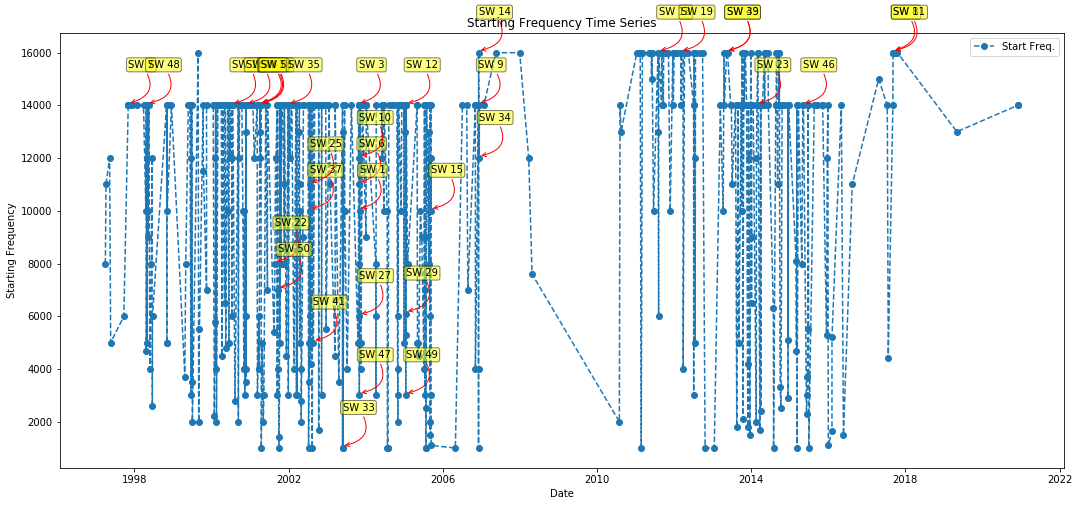

In [114]:
fig1, ax1 = plt.subplots()
ax1.plot(nasaTS1['start_datetime'],nasaTS1['start_frequency'].astype(int),
               linestyle='dashed',marker='o',label='Start Freq.')
ax1.set_title("Starting Frequency Time Series")
ax1.set_xlabel("Date")
ax1.set_ylabel("Starting Frequency")
#ax1.set_yticks([]) #This line is no longer needed after casting start_frequency as integer type
for date, label, val in top50events:
    ax1.annotate(label,xy=(date, val + 75),
                xytext=(date, val + 1425),
                bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.5),
                #horizontalalignment='left',verticalalignment='top',color='red',
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0.75', 
                            color='red'))
plt.legend()
plt.show()

In [115]:
nasaTS2 = nasaTS[nasaTS.CME_width.notnull()]

**Ricardo wrote:** The CME_width has a typo that needs to be removed. In partucular, a record has a value of '360h' it has to be replaced with a value equal to '360' (as it is observed in other records.

In [116]:
nasaTS2 = nasaTS2.replace('360h','360')

In [117]:
set(nasaTS2['CME_width'].astype(int))

{19,
 26,
 38,
 43,
 48,
 50,
 51,
 55,
 56,
 59,
 60,
 64,
 65,
 66,
 68,
 70,
 73,
 76,
 77,
 79,
 80,
 81,
 83,
 84,
 87,
 89,
 90,
 91,
 92,
 93,
 94,
 96,
 98,
 99,
 100,
 101,
 103,
 104,
 105,
 106,
 108,
 109,
 111,
 112,
 113,
 116,
 118,
 119,
 120,
 121,
 122,
 125,
 129,
 130,
 131,
 132,
 133,
 134,
 136,
 138,
 139,
 140,
 141,
 142,
 146,
 148,
 150,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 164,
 165,
 166,
 167,
 169,
 170,
 171,
 173,
 175,
 176,
 177,
 178,
 179,
 181,
 182,
 184,
 186,
 188,
 189,
 190,
 193,
 195,
 196,
 197,
 198,
 199,
 205,
 207,
 208,
 209,
 210,
 211,
 212,
 213,
 214,
 216,
 217,
 223,
 228,
 229,
 236,
 237,
 239,
 242,
 243,
 244,
 245,
 250,
 252,
 254,
 261,
 262,
 263,
 264,
 267,
 268,
 272,
 273,
 276,
 281,
 282,
 289,
 292,
 301,
 314,
 360}

In [118]:
top50events2 = []
for indx in range(len(nasaTS)):
    if np.isnan(nasaTS.iloc[indx,17]) == True:
        pass
    elif pd.isna(nasaTS.iloc[indx,9])==True:
        pass
    else:
        isEvent = (nasaTS.iloc[indx,0],'SW '+str(int(nasaTS.iloc[indx,17])),int(nasaTS.iloc[indx,9]))
        top50events2.append(isEvent)

In [119]:
top50events2

[(Timestamp('1997-11-06 12:20:00'), 'SW 7', 360),
 (Timestamp('1998-05-06 08:25:00'), 'SW 48', 190),
 (Timestamp('2000-07-14 10:30:00'), 'SW 17', 360),
 (Timestamp('2000-11-26 17:00:00'), 'SW 26', 360),
 (Timestamp('2001-04-02 22:05:00'), 'SW 2', 244),
 (Timestamp('2001-04-06 19:35:00'), 'SW 18', 360),
 (Timestamp('2001-04-15 14:05:00'), 'SW 5', 167),
 (Timestamp('2001-08-25 16:50:00'), 'SW 22', 360),
 (Timestamp('2001-09-24 10:45:00'), 'SW 50', 360),
 (Timestamp('2001-12-28 20:35:00'), 'SW 35', 360),
 (Timestamp('2002-07-20 21:30:00'), 'SW 37', 360),
 (Timestamp('2002-07-23 00:50:00'), 'SW 25', 360),
 (Timestamp('2002-08-24 01:45:00'), 'SW 41', 360),
 (Timestamp('2003-05-28 01:00:00'), 'SW 33', 360),
 (Timestamp('2003-10-28 11:10:00'), 'SW 3', 360),
 (Timestamp('2003-10-29 20:55:00'), 'SW 6', 360),
 (Timestamp('2003-11-02 17:30:00'), 'SW 10', 360),
 (Timestamp('2003-11-03 01:15:00'), 'SW 47', 65),
 (Timestamp('2003-11-03 10:00:00'), 'SW 27', 103),
 (Timestamp('2003-11-04 20:00:00'), '

In [120]:
plt.rcParams["figure.figsize"] = (18,8)

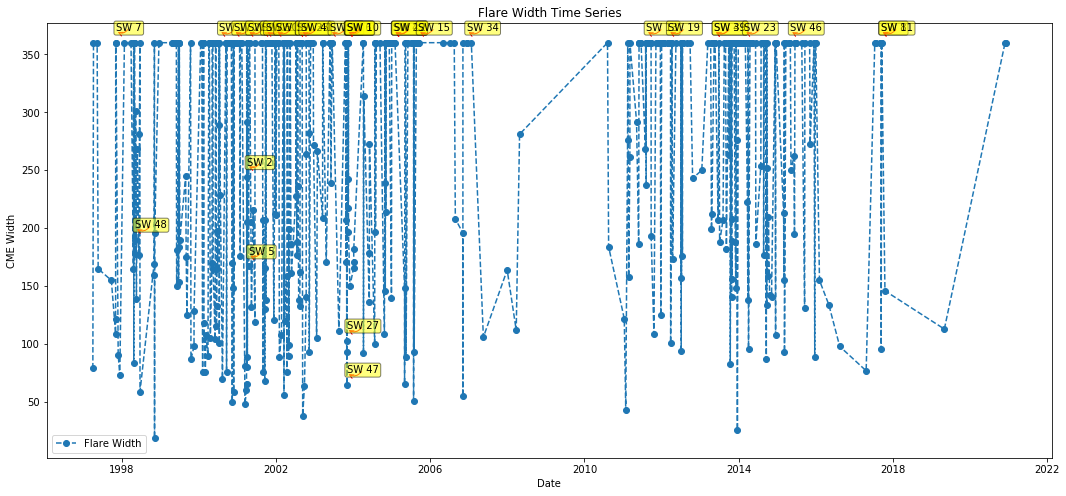

In [121]:
fig2, ax2 = plt.subplots()
ax2.plot(nasaTS2['start_datetime'],nasaTS2['CME_width'].astype(int),
               linestyle='dashed',marker='o',label='Flare Width')
ax2.set_title("Flare Width Time Series")
ax2.set_xlabel("Date")
ax2.set_ylabel("CME Width")
for date, label, val in top50events2:
    ax2.annotate(label,xy=(date, val + 10),
                xytext=(date, val + 10),
                bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.5),
                #horizontalalignment='left',verticalalignment='top',color='red',
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0.5', 
                            color='red'))
plt.legend()
plt.show()

In [122]:
nasaTS3 = nasaDF_sorted2.copy()

In [123]:
nasaTS3['inTop50'] = np.where(pd.isna(nasaTS3['rankSpaceWeather'])==True,0,1)

In [124]:
set(nasaTS3['inTop50'])

{0, 1}

In [125]:
set(nasaTS3['is_halo'])

{False, True}

In [126]:
set(nasaTS3['inTop50'])

{0, 1}

In [127]:
index = ['SpaceWeatherTop50','NASA']

In [128]:
withHalo = [len(nasaTS3.loc[(nasaTS3['inTop50'] == 1) & (nasaTS3['is_halo'] == True)]),
            len(nasaTS3.loc[(nasaTS3['inTop50'] == 0) & (nasaTS3['is_halo'] == True)])]

In [129]:
noHalo = [len(nasaTS3.loc[(nasaTS3['inTop50'] == 1) & (nasaTS3['is_halo'] == False)]),
         len(nasaTS3.loc[(nasaTS3['inTop50'] == 0) & (nasaTS3['is_halo'] == False)])]

In [130]:
halosDF = pd.DataFrame({'withHalo':withHalo,'noHalo':noHalo},index=index)

In [131]:
halosDF

,withHalo,noHalo
SpaceWeatherTop50,28,7
NASA,260,227


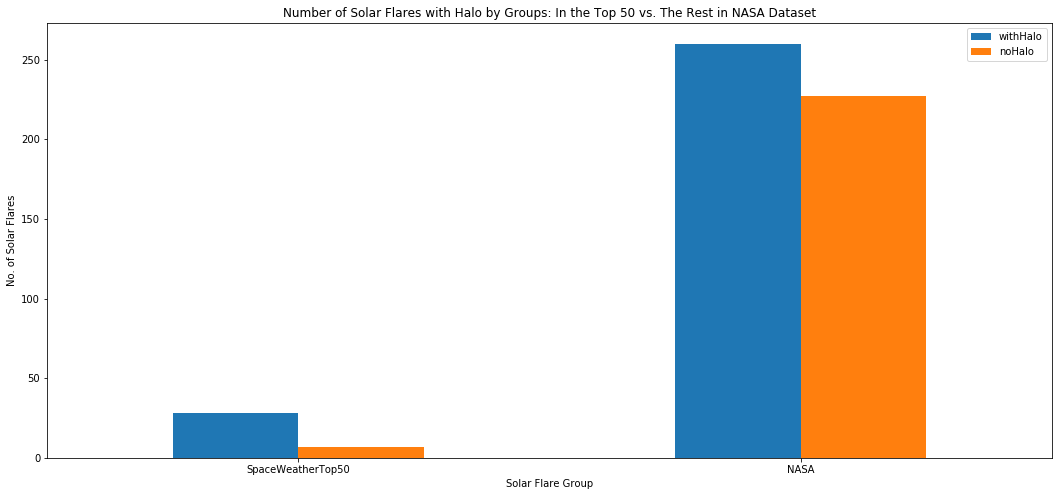

In [132]:

ax3 = halosDF.plot.bar(rot=0)
plt.xlabel("Solar Flare Group")
plt.ylabel("No. of Solar Flares")
plt.title("Number of Solar Flares with Halo by Groups: In the Top 50 vs. The Rest in NASA Dataset")
plt.show()

In [133]:
propWithHaloTop50 = len(nasaTS3.loc[(nasaTS3['inTop50'] == 1) & (nasaTS3['is_halo'] == True)])/len(nasaTS3.loc[(nasaTS3['inTop50'] == 1)])
propWithHaloNASA = len(nasaTS3.loc[(nasaTS3['inTop50'] == 0) & (nasaTS3['is_halo'] == True)])/len(nasaTS3.loc[(nasaTS3['inTop50'] == 0)])

In [134]:
propWithHaloTop50

0.8

In [135]:
propWithHaloNASA

0.5338809034907598

**Ric wrote:** As we can see solar flares in the top 50 (the ones with a corresponding match in the Space Weather list) are more likely to have helo than those in that are in the NASA data set with no corresponding match iin the Space Weather list.

In [136]:
nasaTS4 = nasaTS3.copy()

In [137]:
pd.DatetimeIndex(nasaTS4.start_datetime).month

Int64Index([ 4,  4,  5,  5,  9, 11, 11, 11, 11, 11,
            ...
             7,  9,  9,  9,  9,  9, 10,  5, 11, 12],
           dtype='int64', name='start_datetime', length=522)

In [138]:
pd.DatetimeIndex(nasaTS4.start_datetime).year

Int64Index([1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2019, 2020, 2020],
           dtype='int64', name='start_datetime', length=522)

In [139]:
nasaTS4['start_datetime'].groupby(pd.DatetimeIndex(nasaTS4.start_datetime).year).count()

start_datetime
1997    11
1998    23
1999    19
2000    53
2001    56
2002    53
2003    33
2004    33
2005    40
2006    13
2007     3
2008     2
2010     3
2011    28
2012    27
2013    39
2014    45
2015    23
2016     6
2017     9
2019     1
2020     2
Name: start_datetime, dtype: int64

In [140]:
#nasaTS4.groupby(pd.DatetimeIndex(nasaTS4.start_datetime).year).count()

In [141]:
groupedData = nasaTS4.groupby([nasaTS4['start_datetime'].dt.year, nasaTS4['start_datetime'].dt.month]).agg({'count'})

In [142]:
groupedData.head(12)

start_datetime end_datetime start_frequency  \
                                       count        count           count   
start_datetime start_datetime                                               
1997           4                           2            2               2   
               5                           2            2               2   
               9                           1            1               1   
               11                          5            5               5   
               12                          1            1               1   
1998           1                           1            1               1   
               3                           1            1               1   
               4                           5            5               5   
               5                           6            6               6   
               6                           4            4               4   
               11                          5            5               5   
               12                          1            1               1   

                              end_frequency solar_flare_location  \
                                      count                count   
start_datetime start_datetime                                      
1997           4                          2                    2   
               5                          2                    2   
               9                          1                    1   
               11                         5                    5   
               12                         1                    1   
1998           1                          1                    1   
               3                          1                    1   
               4                          5                    5   
               5                          6                    6   
               6                          4                    4   
               11                         5                    5   
               12                         1                    1   

                              NOAA_flare_region soft_Xray_flare_importance  \
                                          count                      count   
start_datetime start_datetime                                                
1997           4                              2                          2   
               5                              2                          2   
               9                              1                          1   
               11                             5                          5   
               12                             1                          1   
1998           1                              1                          1   
               3                              0                          0   
               4                              5                          5   
               5                              6                          6   
               6                              3                          3   
               11                             2                          3   
               12                             1                          1   

                              cme_datetime central_pos_angle CME_width  \
                                     count             count     count   
start_datetime start_datetime                                            
1997           4                         2                 1         2   
               5                         2                 1         2   
               9                         1                 1         1   
               11                        5                 3         5   
               12                        1                 1         1   
1998           1                         1                 0         1   
               3

In [143]:
nasaTS4Top50 = nasaTS4.loc[(nasaTS4['inTop50'] == 1)]

In [144]:
groupedDataTop50 = nasaTS4Top50.groupby([nasaTS4Top50['start_datetime'].dt.year, nasaTS4Top50['start_datetime'].dt.month]).agg({'count'})
groupedDataTop50

start_datetime end_datetime start_frequency  \
                                       count        count           count   
start_datetime start_datetime                                               
1997           11                          1            1               1   
1998           5                           1            1               1   
2000           7                           1            1               1   
               11                          1            1               1   
2001           4                           3            3               3   
               8                           1            1               1   
               9                           1            1               1   
               12                          1            1               1   
2002           7                           2            2               2   
               8                           1            1               1   
2003           5                           1            1               1   
               10                          2            2               2   
               11                          4            4               4   
2005           1                           3            3               3   
               9                           1            1               1   
2006           12                          3            3               3   
2011           8                           1            1               1   
2012           3                           1            1               1   
2013           5                           2            2               2   
2014           2                           1            1               1   
2015           5                           1            1               1   
2017           9                           2            2               2   

                              end_frequency solar_flare_location  \
                                      count                count   
start_datetime start_datetime                                      
1997           11                         1                    1   
1998           5                          1                    1   
2000           7                          1                    1   
               11                         1                    1   
2001           4                          3                    3   
               8                          1                    1   
               9                          1                    1   
               12                         1                    1   
2002           7                          2                    2   
               8                          1                    1   
2003           5                          1                    1   
               10                         2                    2   
               11                         4                    4   
2005           1                          3                    3   
               9                          1                    1   
2006           12                         3                    3   
2011           8                          1                    1   
2012           3                          1                    1   
2013           5                          2                    2   
2014           2                          1                    1   
2015           5                          1                    1   
2017           9                          2                    2   

                              NOAA_flare_region soft_Xray_flare_importance  \
                                          count                      count   
start_datetime start_datetime                                                
1997           11                             1                          1   
1998           5                              1                          1   
2000         

In [151]:
type(groupedData.index[0][1])

numpy.int64

In [229]:
#pd.Period(year=groupedData.index[0][0],month=groupedData.index[0][1],freq='M')

**Ric wrote:** I tried to use just teanr and month, but datetime() requires also day. Tested out if pd.Period() worked out. It was fine and I was able to build a data frame with it. Howwever, it was not possible to plot. Because of this I switched back to datetime(). Given that the values were grouped by year and month already I just had to provide the las mitune of the month. this would accomplish the same purpose of ploting only by year and month. The value represented the count of solar flare events at the last minute of the month, which is equivalent to solar flare events per month.

In [228]:
nasaDates = []
for indx in range(len(groupedData.index)):
    currPeriodEnd = datetime(year=groupedData.index[indx][0],
                    month=groupedData.index[indx][1],
                    day=monthrange(groupedData.index[indx][0], groupedData.index[indx][1])[1],
                            hour=23,
                            minute=59,
                            second=59)
    nasaDates.append(currPeriodEnd)
nasaDates

[datetime.datetime(1997, 4, 30, 23, 59, 59),
 datetime.datetime(1997, 5, 31, 23, 59, 59),
 datetime.datetime(1997, 9, 30, 23, 59, 59),
 datetime.datetime(1997, 11, 30, 23, 59, 59),
 datetime.datetime(1997, 12, 31, 23, 59, 59),
 datetime.datetime(1998, 1, 31, 23, 59, 59),
 datetime.datetime(1998, 3, 31, 23, 59, 59),
 datetime.datetime(1998, 4, 30, 23, 59, 59),
 datetime.datetime(1998, 5, 31, 23, 59, 59),
 datetime.datetime(1998, 6, 30, 23, 59, 59),
 datetime.datetime(1998, 11, 30, 23, 59, 59),
 datetime.datetime(1998, 12, 31, 23, 59, 59),
 datetime.datetime(1999, 4, 30, 23, 59, 59),
 datetime.datetime(1999, 5, 31, 23, 59, 59),
 datetime.datetime(1999, 6, 30, 23, 59, 59),
 datetime.datetime(1999, 7, 31, 23, 59, 59),
 datetime.datetime(1999, 8, 31, 23, 59, 59),
 datetime.datetime(1999, 9, 30, 23, 59, 59),
 datetime.datetime(1999, 10, 31, 23, 59, 59),
 datetime.datetime(1999, 11, 30, 23, 59, 59),
 datetime.datetime(2000, 1, 31, 23, 59, 59),
 datetime.datetime(2000, 2, 29, 23, 59, 59),
 dat

In [163]:
nasaCounts = [item for item in groupedData.iloc[:,0]]

In [230]:
len(nasaCounts) == len(nasaDates)

True

In [226]:
from calendar import monthrange
top50events3 = []
for indx in range(len(nasaTS4)):
    if nasaTS4.iloc[indx,18] == 0:
        pass
    else:
        isEvent = (datetime(year=nasaTS4.iloc[indx,0].year,
                    month=nasaTS4.iloc[indx,0].month,
                    day=monthrange(nasaTS4.iloc[indx,0].year, nasaTS4.iloc[indx,0].month)[1],
                    hour=23,
                    minute=59,
                    second=59),
                   'SW '+str(int(nasaTS.iloc[indx,17])))
                   
        top50events3.append(isEvent)

In [227]:
top50events3

[(datetime.datetime(1997, 11, 30, 23, 59, 59), 'SW 7'),
 (datetime.datetime(1998, 5, 31, 23, 59, 59), 'SW 48'),
 (datetime.datetime(2000, 7, 31, 23, 59, 59), 'SW 17'),
 (datetime.datetime(2000, 11, 30, 23, 59, 59), 'SW 26'),
 (datetime.datetime(2001, 4, 30, 23, 59, 59), 'SW 2'),
 (datetime.datetime(2001, 4, 30, 23, 59, 59), 'SW 18'),
 (datetime.datetime(2001, 4, 30, 23, 59, 59), 'SW 5'),
 (datetime.datetime(2001, 8, 31, 23, 59, 59), 'SW 22'),
 (datetime.datetime(2001, 9, 30, 23, 59, 59), 'SW 50'),
 (datetime.datetime(2001, 12, 31, 23, 59, 59), 'SW 35'),
 (datetime.datetime(2002, 7, 31, 23, 59, 59), 'SW 37'),
 (datetime.datetime(2002, 7, 31, 23, 59, 59), 'SW 25'),
 (datetime.datetime(2002, 8, 31, 23, 59, 59), 'SW 41'),
 (datetime.datetime(2003, 5, 31, 23, 59, 59), 'SW 33'),
 (datetime.datetime(2003, 10, 31, 23, 59, 59), 'SW 3'),
 (datetime.datetime(2003, 10, 31, 23, 59, 59), 'SW 6'),
 (datetime.datetime(2003, 11, 30, 23, 59, 59), 'SW 10'),
 (datetime.datetime(2003, 11, 30, 23, 59, 59), 

In [231]:
eventsPerMonth = pd.DataFrame({'year_month':nasaDates,'solar_flare_count':nasaCounts})
eventsPerMonth

,year_month,solar_flare_count
0,1997-04-30 23:59:59,2
1,1997-05-31 23:59:59,2
2,1997-09-30 23:59:59,1
3,1997-11-30 23:59:59,5
4,1997-12-31 23:59:59,1
...,...,...
147,2017-09-30 23:59:59,5
148,2017-10-31 23:59:59,1
149,2019-05-31 23:59:59,1
150,2020-11-30 23:59:59,1


In [263]:
import matplotlib.dates as mdates

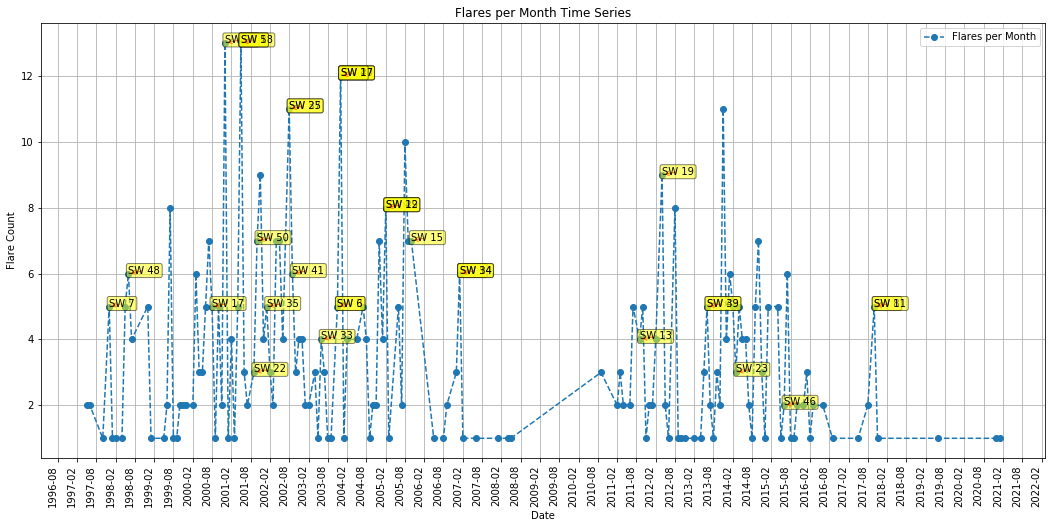

In [275]:
fig4, ax4 = plt.subplots()

ax4.plot(eventsPerMonth['year_month'],eventsPerMonth['solar_flare_count'],
               linestyle='dashed',marker='o',label='Flares per Month')
ax4.set_title("Flares per Month Time Series")
ax4.set_xlabel("Date")
ax4.set_ylabel("Flare Count")

for date, label in top50events3:
    ax4.annotate(label,xy=(date, int(eventsPerMonth.solar_flare_count[eventsPerMonth['year_month']==date])),
                xytext=(date, int(eventsPerMonth.solar_flare_count[eventsPerMonth['year_month']==date])),
                bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.5),
                #horizontalalignment='left',verticalalignment='top',color='red',
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', 
                            color='red'))


half_year_locator = mdates.MonthLocator(interval=6)
year_month_formatter = mdates.DateFormatter("%Y-%m")
ax4.xaxis.set_major_locator(half_year_locator)
ax4.xaxis.set_major_formatter(year_month_formatter)
plt.xticks(rotation=90, ha='right')
plt.grid()
plt.legend()
plt.show()

**Ric wrote:** It might be the case that strong solar flares cluster over time, but in a span of years. It seems that there is a first cluster from 1997 to 2007 and then abother cluster from the end of 2011 to 218